In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

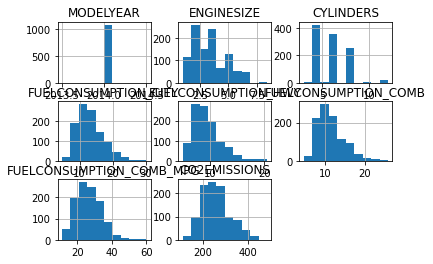

In [4]:
df.hist()
plt.show()

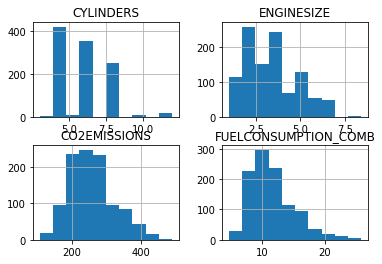

In [5]:
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df [['ENGINESIZE']]
y = df [['CO2EMISSIONS']]
train_X, var_X, train_y, var_y = train_test_split(X,y,random_state=0,train_size=0.8,test_size=0.2)
model = LinearRegression()
model.fit(train_X,train_y)
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[39.24838431]]
Intercept:  [126.18920155]


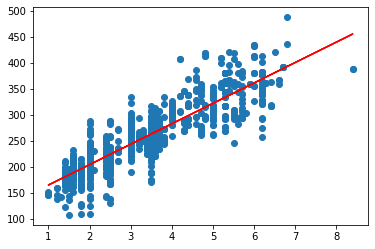

In [11]:
m =  model.coef_[0][0]
c =  model.intercept_[0]
plt.scatter(X,y)
plt.plot(train_X,m*train_X + c,color='r')
plt.show()

In [12]:
print(f'{model.predict(var_X)[0:4]}')
print(f'{var_y.head()}')

[[342.05531526]
 [220.3853239 ]
 [220.3853239 ]
 [232.15983919]]
     CO2EMISSIONS
766           356
204           209
629           230
897           212
711           168


In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
predicted_val = model.predict(var_X)
actual_val = var_y
mae = mean_absolute_error(actual_val,predicted_val)
print(f'MAE: {mae}')
mse = mean_squared_error(actual_val,predicted_val)
print(f'MSE: {mse}')

MAE: 25.568890456023563
MSE: 1181.5288093035547


c:\users\xps\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Coefficients:  [40.19617636]
Intercept:  [123.92208426]


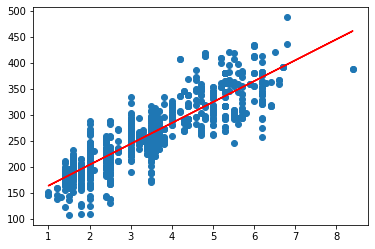

In [14]:
from sklearn.linear_model import SGDRegressor
model_sec = SGDRegressor()
model_sec.fit(train_X,train_y)
print ('Coefficients: ', model_sec.coef_)
print ('Intercept: ',model_sec.intercept_)
m_sec =  model_sec.coef_[0]
c_sec =  model_sec.intercept_[0]
plt.scatter(X,y)
# plt.show()
plt.plot(train_X,m_sec*train_X+c_sec,color = 'r')
plt.show()

In [15]:
print(f'{model_sec.predict(var_X)[0:4]}')
print(f'{var_y.head()}')

[345.00105423 220.39290752 220.39290752 232.45176043]
     CO2EMISSIONS
766           356
204           209
629           230
897           212
711           168


In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
predicted_val_div = model_sec.predict(var_X)
actual_val_div = var_y
mae = mean_absolute_error(actual_val_div,predicted_val_div)
print(f'MAE: {mae}')
mse = mean_squared_error(actual_val_div,predicted_val_div)
print(f'MSE: {mse}')

MAE: 25.69878514001324
MSE: 1198.2246112918745


60.43620127685582
18.267490943198386


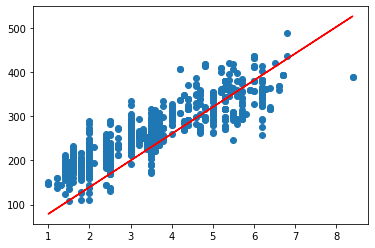

766     350.666598
204     163.314374
629     163.314374
897     181.445234
711     169.357994
           ...    
822     139.139893
1029    139.139893
798     114.965413
803     114.965413
251     102.878173
Name: ENGINESIZE, Length: 214, dtype: float64


In [59]:
# # Finding 
XX = train_X.iloc[:,0]
YY = train_y.iloc[:,0]
list_check_val_y=[]
m_grad=0
c_grad=0
L=0.0001
epochs = 1000
n=float(len(train_X))
for i in range(len(train_X)):
    preds_y = c_grad + m_grad * XX
    error = YY - preds_y
    D_m= (-2/n)* np.sum(XX * error)
    D_c = (-2/n) * np.sum(error)
    m_grad = m_grad - D_m * L
    c_grad = c_grad - D_c * L
print(m_grad)
print(c_grad)
plt.scatter(X,y)
# plt.show()
plt.plot(train_X,m_grad*train_X+c_grad,color = 'r')
plt.show()

XX_check = var_X.iloc[:,0]
YY_check = var_y.iloc[:,0]
check_val=0
sum_error= 0
for j in range(len(var_X)):
    check_val_y = m_grad * XX_check+ c_grad
    list_check_val_y.append(check_val_y)
# print(list_check_val_y[0])
# print(var_y.head())

In [60]:
# print(len(pd.DataFrame(list_check_val_y)))
# print(len(var_y))
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(var_y,pd.DataFrame(list_check_val_y[0]))
print(f'MAE: {mae}')
mse = mean_squared_error(var_y,pd.DataFrame(list_check_val_y[0]))
print(f'MSE: {mse}')

MAE: 46.528943890165024
MSE: 3062.043636468768
